In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('C://content//Phishing_Legitimate_full.csv')

In [3]:
# First 5 sample rows of Dataset
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
# Name of columns
list(df.columns)

['id',
 'NumDots',
 'SubdomainLevel',
 'PathLevel',
 'UrlLength',
 'NumDash',
 'NumDashInHostname',
 'AtSymbol',
 'TildeSymbol',
 'NumUnderscore',
 'NumPercent',
 'NumQueryComponents',
 'NumAmpersand',
 'NumHash',
 'NumNumericChars',
 'NoHttps',
 'RandomString',
 'IpAddress',
 'DomainInSubdomains',
 'DomainInPaths',
 'HttpsInHostname',
 'HostnameLength',
 'PathLength',
 'QueryLength',
 'DoubleSlashInPath',
 'NumSensitiveWords',
 'EmbeddedBrandName',
 'PctExtHyperlinks',
 'PctExtResourceUrls',
 'ExtFavicon',
 'InsecureForms',
 'RelativeFormAction',
 'ExtFormAction',
 'AbnormalFormAction',
 'PctNullSelfRedirectHyperlinks',
 'FrequentDomainNameMismatch',
 'FakeLinkInStatusBar',
 'RightClickDisabled',
 'PopUpWindow',
 'SubmitInfoToEmail',
 'IframeOrFrame',
 'MissingTitle',
 'ImagesOnlyInForm',
 'SubdomainLevelRT',
 'UrlLengthRT',
 'PctExtResourceUrlsRT',
 'AbnormalExtFormActionR',
 'ExtMetaScriptLinkRT',
 'PctExtNullSelfRedirectHyperlinksRT',
 'CLASS_LABEL']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [6]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

id has 10000 unique values
NumDots has 17 unique values
SubdomainLevel has 13 unique values
PathLevel has 18 unique values
UrlLength has 226 unique values
NumDash has 25 unique values
NumDashInHostname contains:			[0 1 2 4 3 5 7 6 9 8]
AtSymbol contains:			[0 1]
TildeSymbol contains:			[0 1]
NumUnderscore has 16 unique values
NumPercent has 14 unique values
NumQueryComponents has 19 unique values
NumAmpersand has 16 unique values
NumHash contains:			[0 1]
NumNumericChars has 82 unique values
NoHttps contains:			[1 0]
RandomString contains:			[0 1]
IpAddress contains:			[0 1]
DomainInSubdomains contains:			[0 1]
DomainInPaths contains:			[0 1]
HttpsInHostname contains:			[0]
HostnameLength has 74 unique values
PathLength has 147 unique values
QueryLength has 164 unique values
DoubleSlashInPath contains:			[0 1]
NumSensitiveWords contains:			[0 1 2 3]
EmbeddedBrandName contains:			[0 1]
PctExtHyperlinks has 2510 unique values
PctExtResourceUrls has 1489 unique values
ExtFavicon contains:

According to the Data descrition, these are the meaning of the values in the data

1 means legitimate
0 is suspicious
-1 is phishing

In [7]:
df = df.drop(columns=['id'])

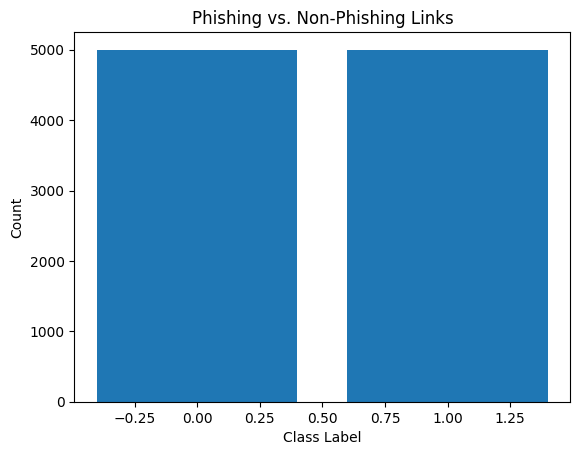

In [8]:
class_counts = df['CLASS_LABEL'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)

# Add labels and title
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Phishing vs. Non-Phishing Links')

# Add tick labels


# Display the chart
plt.show()

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('C://content//Phishing_Legitimate_full.csv')

# Split the data into features (X) and target variable (y)
X = df.drop('CLASS_LABEL', axis=1)
y = df['CLASS_LABEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

# Print the results
print("Random Forest Classifier Results:")
print("Accuracy:", rf_accuracy)
print("Classification Report:")
print(rf_report)

Random Forest Classifier Results:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

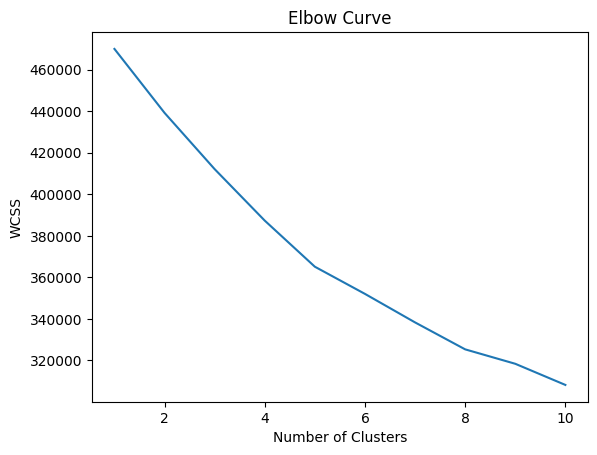

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Distribution:
0    6449
2    3325
1     226
Name: Cluster, dtype: int64


In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C://content//Phishing_Legitimate_full.csv')


# Select the features for clustering
features = df.drop(['id', 'CLASS_LABEL'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10

for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal number of clusters
plt.plot(range(1, max_clusters+1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

# Choose the optimal number of clusters based on the elbow curve
n_clusters = 3

# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
df['Cluster'] = cluster_labels

# Print the cluster distribution
print("Cluster Distribution:")
print(df['Cluster'].value_counts())

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('C://content//Phishing_Legitimate_full.csv')

# Select the features and target variable
X = df.drop(['id', 'CLASS_LABEL'], axis=1)
y = df['CLASS_LABEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm = SVC()

# Train the SVM classifier
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8635
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       988
           1       0.84      0.91      0.87      1012

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000

